In [35]:
# https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/about_data

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Load the dataset
url = "/content/drive/MyDrive/Colab Notebooks/Meteorite_Landings_20240925.csv"
df = pd.read_csv(url)

df.head()


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [56]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [60]:
df.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


# Handle Missing Values

In [64]:
# Checking for missing values

print("Missing values in each column:\n\n", df.isnull().sum())


Missing values in each column:

 name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [65]:

# Dropping columns with too many missing values (e.g., 'geolocation')
df.drop(['GeoLocation'], axis=1, inplace=True)


In [66]:
# Fill missing values for 'mass (g)' with median as it has extreme outliers
df['mass (g)'] = df['mass (g)'].fillna(df['mass (g)'].median())

# Fill missing values for 'year' with mode as it's categorical-like
df['year'] = df['year'].fillna(df['year'].mode()[0])


In [67]:
# Drop rows with remaining missing values
df.dropna(inplace=True)

# 2. Detect and Handle Outliers

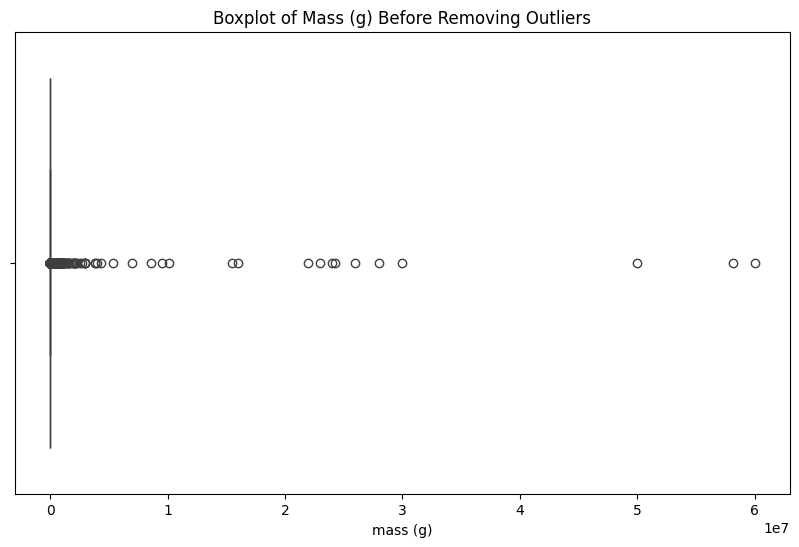

In [68]:
# Visualizing 'mass (g)' to detect outliers using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mass (g)'])
plt.title("Boxplot of Mass (g) Before Removing Outliers")
plt.show()


In [69]:
# Removing outliers using the IQR method
Q1 = df['mass (g)'].quantile(0.25)
Q3 = df['mass (g)'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['mass (g)'] < (Q1 - 1.5 * IQR)) | (df['mass (g)'] > (Q3 + 1.5 * IQR))

# Remove outliers
df = df[~outlier_condition]


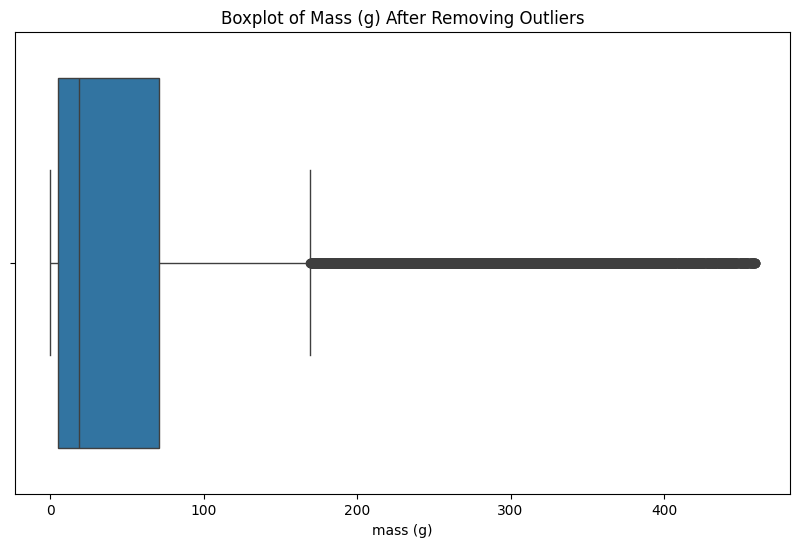

In [70]:
# Visualizing again after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mass (g)'])
plt.title("Boxplot of Mass (g) After Removing Outliers")
plt.show()


# 3. Normalize or Scale Features

In [72]:
# Using Min-Max scaling for the 'mass (g)' column
scaler = MinMaxScaler()
df['mass_scaled'] = scaler.fit_transform(df[['mass (g)']])

# Normalize other numerical columns (like 'reclat' and 'reclong' for latitude/longitude)
df[['reclat', 'reclong']] = scaler.fit_transform(df[['reclat', 'reclong']])

# Check the first few rows to verify
df.head()


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,mass_scaled
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,0.898687,0.329899,0.045746
12,Aire-sur-la-Lys,425,Valid,Unknown,32.6,Fell,1769.0,0.897982,0.322686,0.071015
17,Al Rais,446,Valid,CR2-an,160.0,Fell,1957.0,0.727212,0.394205,0.348538
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002.0,0.866461,0.329768,0.548948
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,2003.0,0.568368,0.318198,0.559404


# 4. Split Data into Training and Testing Sets

In [73]:
# Select features (let's assume 'mass_scaled', 'reclat', 'reclong') and target (e.g., 'fall')
X = df[['mass_scaled', 'reclat', 'reclong']]
y = df['fall']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Optional: Save the preprocessed data
df.to_csv("preprocessed_meteorite_data.csv", index=False)
print("Preprocessed data saved as 'preprocessed_meteorite_data.csv'.")


Training data shape: (22590, 3)
Testing data shape: (9682, 3)
Preprocessed data saved as 'preprocessed_meteorite_data.csv'.
